<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/main/Megastore_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annual sales data of a popular supermarket is to be analysed here

Objective of the analysis:

1. Getting Insights to make data-driven business decisions. 
2. Usage of Machine learning to build predictive models.
3. Usage of Evaluation metrics to evaluate the performance of the model


The store is known as 'Megastore'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd

In [8]:
mega=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MegaStore.csv')

In [9]:
mega.head(6)

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
0,FDU28,Frozen Foods,19.20,Regular,0.094450,187.8214,OUT_017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
1,FDY07,Fruits and Vegetables,11.80,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
2,FDA03,Dairy,18.50,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530
3,FDX32,Fruits and Vegetables,15.10,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
4,FDS46,Snack Foods,17.60,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076
5,FDF32,Fruits and Vegetables,16.35,Low Fat,0.068024,196.4426,OUT_013,1987,High,Tier 3,Supermarket Type1,1977.4260


In [11]:
mega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     8523 non-null   object 
 1   Itemtype                 8523 non-null   object 
 2   Weight                   7060 non-null   float64
 3   FatContent               8523 non-null   object 
 4   Visibility               8523 non-null   float64
 5   MRP                      8523 non-null   float64
 6   Outlet                   8523 non-null   object 
 7   OutletEstablishmentYear  8523 non-null   int64  
 8   OutletSize               6113 non-null   object 
 9   OutletCity               8523 non-null   object 
 10  OutletType               8523 non-null   object 
 11  Sales                    8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
mega.shape

(8523, 12)

In [13]:

mega.describe()

,Weight,Visibility,MRP,OutletEstablishmentYear,Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


As we can see weight is a feild where some of the values are absent

# Data cleansing

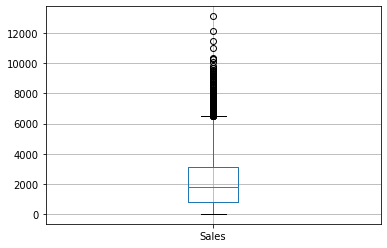

In [14]:
mega[['Sales']].boxplot()

In [15]:
mega[mega['Sales']>10500]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
1450,FDZ20,Fruits and Vegetables,NaN,Low Fat,0.000000,253.0356,OUT_027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,Snack Foods,NaN,Low Fat,0.088840,254.2672,OUT_027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
5223,FDQ19,Fruits and Vegetables,NaN,Regular,0.014296,242.6512,OUT_027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
7188,NCE42,Household,NaN,Low Fat,0.010551,234.9958,OUT_027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


We can not omit the rows because these are all potent data for our model

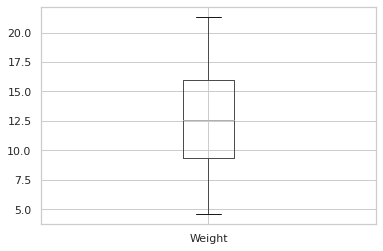

In [44]:
mega[['Weight']].boxplot()

We have four outliers, but for the timebeing, we will keep the data as it is

In [16]:
mega.isnull().sum()

Item                          0
Itemtype                      0
Weight                     1463
FatContent                    0
Visibility                    0
MRP                           0
Outlet                        0
OutletEstablishmentYear       0
OutletSize                 2410
OutletCity                    0
OutletType                    0
Sales                         0
dtype: int64

As null values affect the ML model, hence let us fill up them with default values.

In [17]:
mega.loc[mega.Weight.isnull(),'Weight']= mega.Weight.median()

In [18]:
mega.Weight.median()

12.6

In [19]:
mega.loc[mega.Weight.isnull()]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales


In [20]:
mega.isnull().sum()

Item                          0
Itemtype                      0
Weight                        0
FatContent                    0
Visibility                    0
MRP                           0
Outlet                        0
OutletEstablishmentYear       0
OutletSize                 2410
OutletCity                    0
OutletType                    0
Sales                         0
dtype: int64

Will do the same with outletsize

In [22]:
a=mega['OutletSize'].mode()

In [45]:
mega.loc[mega['OutletSize'].isnull(),'OutletSize']= a[0]

most frequent store size is medium. So whereever the outletsize was not mentioned, we replaced them with 'Medium'

In [46]:
mega.isnull().sum()

Item                       0
Itemtype                   0
Weight                     0
FatContent                 0
Visibility                 0
MRP                        0
Outlet                     0
OutletEstablishmentYear    0
OutletSize                 0
OutletCity                 0
OutletType                 0
Sales                      0
age_of_store               0
dtype: int64

In [48]:
mega['FatContent'].value_counts()

Low Fat    5089
Regular    2889
Low         316
reg         117
low fat     112
Name: FatContent, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


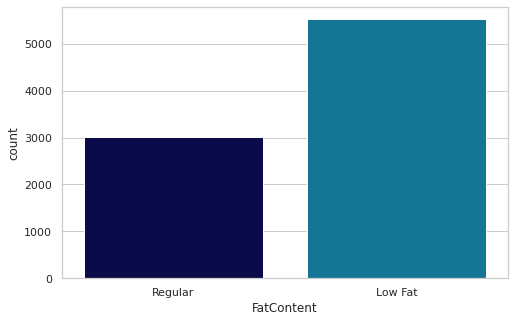

In [49]:
mega['FatContent'].replace(['low fat','LF','reg', 'Low'],['Low Fat','Low Fat','Regular','Low Fat'],inplace = True)
mega['FatContent']= mega['FatContent'].astype(str)
plt.figure(figsize=(8,5))
sns.countplot('FatContent',data=mega,palette='ocean')

In [25]:
vnn= lambda a : (2022-a)
mega['age_of_store']= mega['OutletEstablishmentYear'].apply(vnn)

In [26]:
mega.head(10)

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales,age_of_store
0,FDU28,Frozen Foods,19.20,Regular,0.094450,187.8214,OUT_017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,15
1,FDY07,Fruits and Vegetables,11.80,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,23
2,FDA03,Dairy,18.50,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530,25
3,FDX32,Fruits and Vegetables,15.10,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,23
4,FDS46,Snack Foods,17.60,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076,25
5,FDF32,Fruits and Vegetables,16.35,Low Fat,0.068024,196.4426,OUT_013,1987,High,Tier 3,Supermarket Type1,1977.4260,35
6,FDP49,Breakfast,9.00,Regular,0.069089,56.3614,OUT_046,1997,Small,Tier 1,Supermarket Type1,1547.3192,25
7,NCB42,Health and Hygiene,11.80,Low Fat,0.008596,115.3492,OUT_018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,13
8,FDP49,Breakfast,9.00,Regular,0.069196,54.3614,OUT_049,1999,Medium,Tier 1,Supermarket Type1,718.3982,23
9,DRI11,Hard Drinks,12.60,Low Fat,0.034238,113.2834,OUT_027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,37


As age of the store is more convenient to use than establishment year, we created a new column 'age_of_store'

In [47]:
mega.describe()

,Weight,Visibility,MRP,OutletEstablishmentYear,Sales,age_of_store
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914,24.168133
std,4.22724,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.55500,0.000000,31.290000,1985.000000,33.290000,13.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,18.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,23.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,35.000000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,37.000000


In [27]:
mega[mega.duplicated()]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales,age_of_store


So, we don't have any duplicate value in our data set

Let's check, which item type is frequently kept in stores

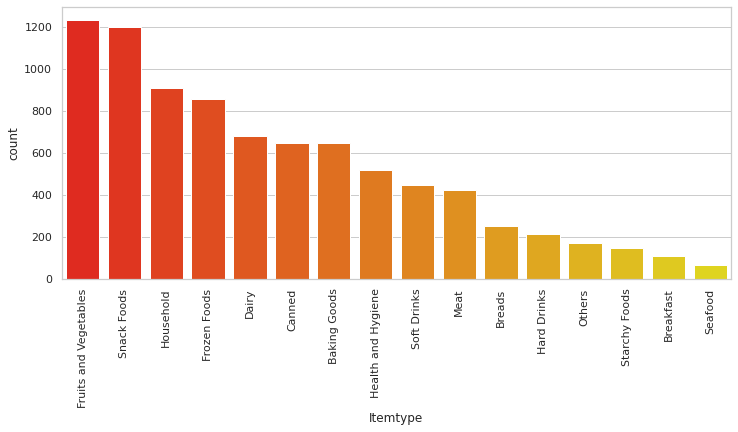

In [50]:
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.countplot(x="Itemtype", data=mega, order=mega['Itemtype'].value_counts().sort_values(ascending=False).index, palette='autumn')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


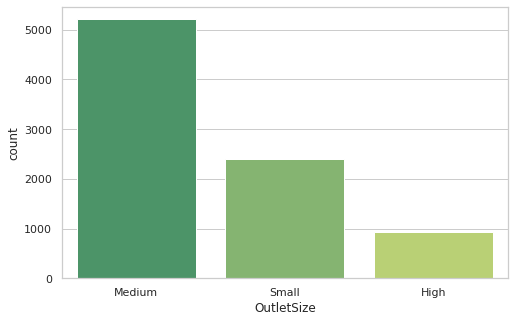

In [51]:
plt.figure(figsize=(8,5))
sns.countplot('OutletSize',data=mega,palette='summer')

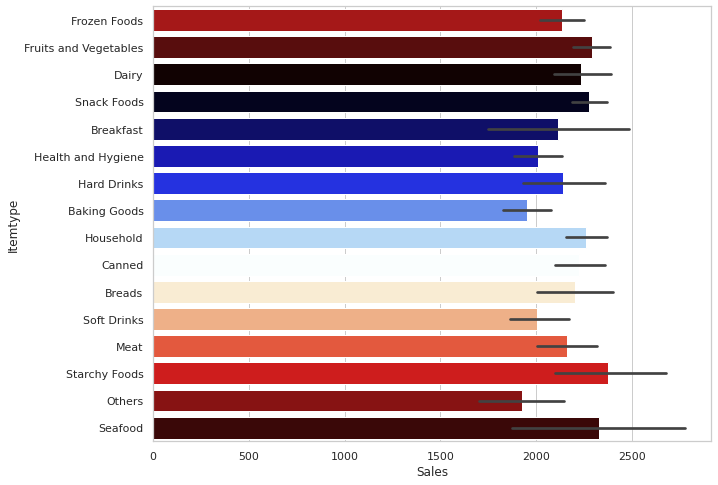

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(y='Itemtype',x='Sales',data=mega,palette='flag')

In [54]:
mega['Item_Type_Combined'] = mega['Item'].apply(lambda x: x[0:2])
mega['Item_Type_Combined'] = mega['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [55]:
mega['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [56]:
#Mark non-consumables as separate category in low_fat:
mega.loc[mega['Item_Type_Combined']=="Non-Consumable",'FatContent'] = "Non-Edible"
mega['FatContent'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: FatContent, dtype: int64

Now, let's get the top outlets on the basis of their sales count

In [29]:
Outlets_sell = mega.groupby("Outlet")[["Sales"]].sum().sort_values(by='Sales', ascending = False)
Outlets_sell

,Sales
Outlet,
OUT_027,3.453926e+06
OUT_035,2.268123e+06
OUT_049,2.183970e+06
OUT_017,2.167465e+06
OUT_013,2.142664e+06
OUT_046,2.118395e+06
OUT_045,2.036725e+06
OUT_018,1.851823e+06
OUT_010,1.883402e+05


Now we will compare the age of the top performing outlets

In [30]:
Outlet_age = mega[['Outlet','age_of_store']].drop_duplicates()
Outlet_age

,Outlet,age_of_store
0,OUT_017,15
1,OUT_049,23
2,OUT_046,25
5,OUT_013,35
7,OUT_018,13
9,OUT_027,37
10,OUT_035,18
14,OUT_019,37
19,OUT_010,24
24,OUT_045,20


In [31]:
age_vs_sales = pd.merge(Outlets_sell,Outlet_age, how='left', on='Outlet')
age_vs_sales

,Outlet,Sales,age_of_store
0,OUT_027,3.453926e+06,37
1,OUT_035,2.268123e+06,18
2,OUT_049,2.183970e+06,23
3,OUT_017,2.167465e+06,15
4,OUT_013,2.142664e+06,35
5,OUT_046,2.118395e+06,25
6,OUT_045,2.036725e+06,20
7,OUT_018,1.851823e+06,13
8,OUT_010,1.883402e+05,24
9,OUT_019,1.796941e+05,37


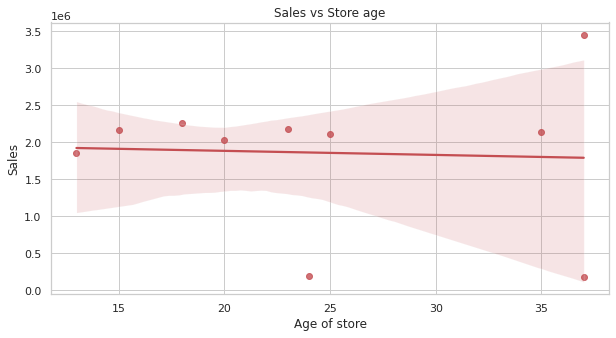

In [32]:
plt.figure(figsize=(10,5))
sns.regplot(x='age_of_store',y='Sales', data=age_vs_sales, color="r")
plt.xlabel('Age of store')
plt.ylabel('Sales')
plt.title('Sales vs Store age')
plt.show()

As we can see in the graph, Age of the store does not matter while we consider total sales.

But in some cases, for some type of products, customer may face trust issues in new stores. So to build a machine learning model it is best to take multiple linear regression method.

Our ultimate goal is to predict the sales, depending upon the item type, weight, fatcontent, visibility, MRP, Outlet type, age of store.

In [57]:
le = LabelEncoder()
var_mod = ['FatContent','OutletCity','OutletSize','Item_Type_Combined','OutletType','Outlet']
for i in var_mod:
    mega[i] = le.fit_transform(mega[i])

In [58]:
mega.head()

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales,age_of_store,Item_Type_Combined
0,FDU28,Frozen Foods,19.2,2,0.094450,187.8214,2,2007,1,1,1,4710.5350,15,1
1,FDY07,Fruits and Vegetables,11.8,0,0.000000,45.5402,9,1999,1,0,1,1516.0266,23,1
2,FDA03,Dairy,18.5,2,0.045464,144.1102,8,1997,2,0,1,2187.1530,25,1
3,FDX32,Fruits and Vegetables,15.1,2,0.100014,145.4786,9,1999,1,0,1,1589.2646,23,1
4,FDS46,Snack Foods,17.6,2,0.047257,119.6782,8,1997,2,0,1,2145.2076,25,1


In [59]:
#One Hot Coding:
mega = pd.get_dummies(mega, columns=['FatContent','OutletCity','OutletSize','OutletType','Item_Type_Combined','Outlet'])

In [60]:
mega.head()

,Item,Itemtype,Weight,Visibility,MRP,OutletEstablishmentYear,Sales,age_of_store,FatContent_0,FatContent_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDU28,Frozen Foods,19.2,0.094450,187.8214,2007,4710.5350,15,0,0,...,0,0,1,0,0,0,0,0,0,0
1,FDY07,Fruits and Vegetables,11.8,0.000000,45.5402,1999,1516.0266,23,1,0,...,0,0,0,0,0,0,0,0,0,1
2,FDA03,Dairy,18.5,0.045464,144.1102,1997,2187.1530,25,0,0,...,0,0,0,0,0,0,0,0,1,0
3,FDX32,Fruits and Vegetables,15.1,0.100014,145.4786,1999,1589.2646,23,0,0,...,0,0,0,0,0,0,0,0,0,1
4,FDS46,Snack Foods,17.6,0.047257,119.6782,1997,2145.2076,25,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
main=mega.drop(['Item','Itemtype','OutletEstablishmentYear'],axis=1)

In [62]:
main

,Weight,Visibility,MRP,Sales,age_of_store,FatContent_0,FatContent_1,FatContent_2,OutletCity_0,OutletCity_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,19.200,0.094450,187.8214,4710.5350,15,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,11.800,0.000000,45.5402,1516.0266,23,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,18.500,0.045464,144.1102,2187.1530,25,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,15.100,0.100014,145.4786,1589.2646,23,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17.600,0.047257,119.6782,2145.2076,25,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,35,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,20,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,18,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,13,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
scaler = StandardScaler().fit(main[[ 'Sales','Weight', 'Visibility', 'MRP', 'age_of_store']])
main_norm=scaler.transform(main[['Sales','Weight', 'Visibility', 'MRP', 'age_of_store']])
main_norm

array([[ 1.48221216,  1.51090416,  0.54884531,  0.75200828, -1.09519035],
       [-0.38986317, -0.23974956, -1.28175775, -1.53284753, -0.13954076],
       [ 0.00343653,  1.34530178, -0.400588  ,  0.05006178,  0.09937163],
       ...,
       [-0.57909963, -0.52363935, -0.59978449, -0.89720755, -0.73682175],
       [-0.19672492, -1.32562802,  1.53287976, -0.60797692, -1.33410274],
       [-0.82959407,  0.46997492, -0.41193591, -1.05226104,  0.09937163]])

In [65]:
main_norm_df=pd. DataFrame(main_norm, columns=['Sales','Weight', 'Visibility', 'MRP', 'age_of_store'])
main_norm_df=main_norm_df.join(main[main.columns.drop(['Sales','Weight', 'Visibility', 'MRP', 'age_of_store'])])

In [66]:
Y = main_norm_df['Sales']
X = main_norm_df[main_norm_df.columns.drop(['Sales'])]
X.shape

(8523, 30)

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15, random_state=100)
X_train.shape , X_test.shape

((7244, 30), (1279, 30))

In [68]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [69]:
model.score(X_test,Y_test)

0.5673863295702382

In [70]:
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  0.5625220559059431
Test Score (R-Squared) 0.5673863295702382


In [71]:
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.6583240855118124
Test RMSE :  0.6743765204691141
